In [1]:
options(jupyter.plot_mimetypes = c("image/png"))

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggbreak))
suppressPackageStartupMessages(library(patchwork))

## For loading Arial font for publication
# library(extrafont)

# font_import(pattern = "Arial", prompt = FALSE)
# loadfonts(device = "pdf")

In [2]:
# Read the master df
master_csv <- "resources/carrier.genes.plus_actual_at_risk_birth_rate.csv"
master_df <- read.csv(file = master_csv, header = TRUE, sep = ",", stringsAsFactors = FALSE)

In [3]:
# Define custom colors for ACMG tiers
custom_colors <- c(
  "tier_1" = "#6F9BFF", 
  "tier_2" = "#E2695F", 
  "tier_3" = "#71EDBC", 
  "tier_4" = "#FEE54C", 
  "grey" = "#333333", 
  "light_grey" = "#CCCCCC"
)

In [4]:
acmg_t1_2 <- master_df %>%
  filter(acmg_tier_hkgi == "tier_1" | acmg_tier_hkgi == "tier_2") %>% 
  select(gene, is_xlinked, acmg_tier_hkgi, carrier_rate_hkgi) %>% 
  filter(carrier_rate_hkgi > 0.001) %>% 
  mutate(acmg_tier_hkgi = factor(acmg_tier_hkgi, levels = c("tier_1", "tier_2"))) %>% 
  arrange(acmg_tier_hkgi, desc(carrier_rate_hkgi))
acmg_t1_2$gene <- factor(acmg_t1_2$gene, levels = acmg_t1_2$gene)
acmg_t1_2$log_carrier_rate_hkgi <- exp(acmg_t1_2$carrier_rate_hkgi)

In [5]:
acmg_t3 <- master_df %>%
  filter(acmg_tier_hkgi == "tier_3") %>%
  select(gene, is_xlinked, acmg_tier_hkgi, carrier_rate_hkgi) %>% 
  filter(carrier_rate_hkgi > 0.001) %>% 
  arrange(acmg_tier_hkgi, desc(carrier_rate_hkgi))
acmg_t3$gene <- factor(acmg_t3$gene, levels = acmg_t3$gene)

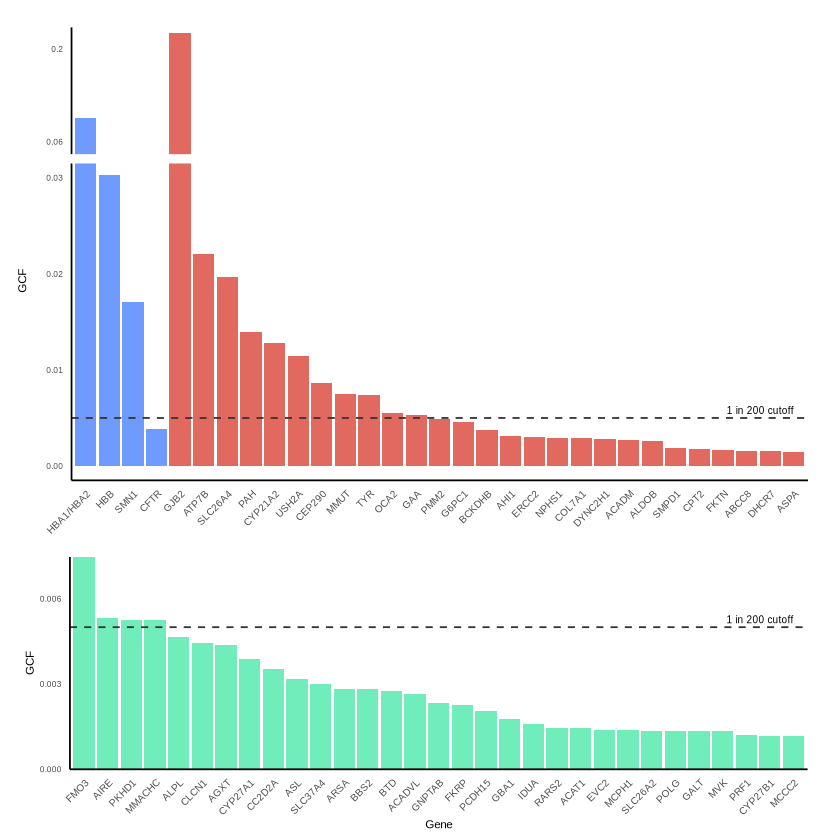

In [6]:
# Plot for acmg_t1_2
p1 <- ggplot(acmg_t1_2, aes(x = gene, y = carrier_rate_hkgi, fill = acmg_tier_hkgi)) +
  geom_bar(stat = "identity") + 
  geom_hline(yintercept = 0.005, linetype = "dashed", color = custom_colors["grey"]) +  # Add horizontal line
  # Add annotation text for the cutoff line, positioned on the right side
annotate("text", x = length(acmg_t1_2$gene), y = 0.005, label = "1 in 200 cutoff", 
           hjust = 1, vjust = -0.5, size = 6/ggplot2::.pt, 
         # family = "Arial",
         color = "black")  +
  scale_fill_manual(values = custom_colors) + 
  labs(
    y = "GCF",
    fill = "ACMG Tier"
  ) +
  scale_y_break(c(0.03, 0.05), 
             scales = c(0.4),
             ticklabels = c(0.06, 0.20)) +
  scale_y_continuous(
      expand = c(0, 0),
      # Remove secondary axis
      sec.axis = dup_axis(labels = NULL, name = NULL)
  ) + 
  # theme_minimal(base_family = "Arial") + 
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 5),  # Former x-axis text, now on y-axis
    axis.text.x = element_text(angle = 45, size = 6, hjust = 1),  # Former y-axis text, now on x-axis
    plot.title = element_blank(),
    axis.title.y = element_text(size = 7),  # Former x-axis title
    axis.title.x = element_blank(),
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"), 
    legend.title = element_text(size = 7),
    legend.text = element_text(size = 6),
    legend.key.size = unit(0.3, "cm"),
    legend.position = "none",
    # Remove all elements for the right y-axis
    axis.text.y.right = element_blank(),
    axis.ticks.y.right = element_blank(),
    axis.line.y.right = element_blank(),
    # Ensure no panel grid lines appear on either side
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    # Set fixed plot dimensions
    plot.margin = margin(0, 0, 0, 0)
  )
  

# Plot for acmg_t3
p2 <- ggplot(acmg_t3, aes(x = gene, y = carrier_rate_hkgi, fill = acmg_tier_hkgi)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0.005, linetype = "dashed", color = custom_colors["grey"]) +  # Add horizontal line
   annotate("text", x = length(acmg_t3$gene), y = 0.005, label = "1 in 200 cutoff", 
           hjust = 1, vjust = -0.5, size = 6/ggplot2::.pt, 
            # family = "Arial",
            color = "black") +
  scale_fill_manual(values = custom_colors) +
  labs(
    title = "",
    x = "Gene",
    y = "GCF"
  ) +
  scale_y_continuous(
    breaks = c(0.000, 0.003, 0.006),
    labels = c("0.000", "0.003", "0.006"),
    expand = c(0, 0)
  ) +
  # theme_minimal(base_family = "Arial") + 
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 5),  # Former x-axis text, now on y-axis
    axis.text.x = element_text(angle = 45, size = 6, hjust = 1),  # Former y-axis text, now on x-axis
    plot.title = element_blank(),
    axis.title.y = element_text(size = 7),  # Former x-axis title
    axis.title.x = element_text(size = 7),  # Former y-axis title
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"), 
    legend.title = element_text(size = 7),
    legend.text = element_text(size = 6),
    legend.key.size = unit(0.3, "cm"),
    legend.position = "none",
    # Set fixed plot dimensions
    plot.margin = margin(0, 14, 0, 10)
  )

combined_plot <- p1 / p2 +
	plot_layout(ncol = 1, heights = c(1,0.5))

combined_plot


# Save the plot to pdf
# ggsave(
# 	filename = "results/secondary/recessive/main/GCF_acmg.pdf",
# 	plot = combined_plot,
# 	width = 176, height = 64,
# 	units = "mm", dpi = 600
# )